## Monte Carlo: Forecasting Stock Prices

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col= 'Date')
data.head()

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914


In [4]:
#Log Returns:
log_returns = np.log(1 + data.pct_change()) #percentage change
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


<Axes: xlabel='Date'>

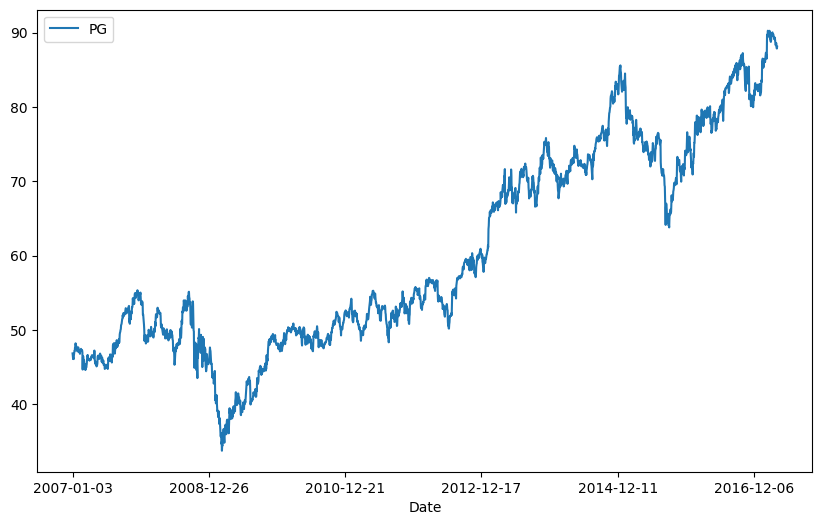

In [5]:
#Graph of P&G Stock Price:
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

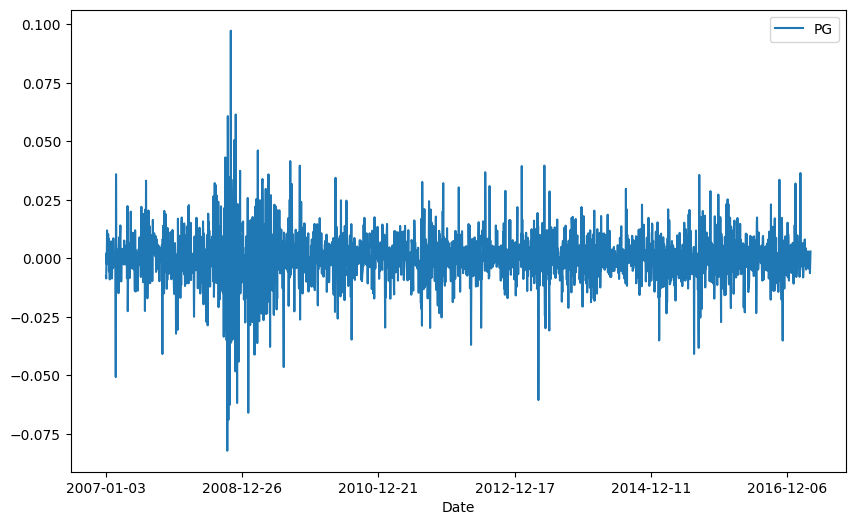

In [6]:
#Graph of Log Returns:
log_returns.plot(figsize=(10,6))

# Normally distributed with a stable mean.

In [13]:
# Mean
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [14]:
# Variance
var = log_returns.var()
var

PG    0.000124
dtype: float64

Calculating Drift: Best Approxiamtion of Future Rates of the stock
$$
drift = u - \frac{1}{2} \times \text{var}
$$

In [15]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [16]:
#Standard Deviation of Log Returns:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

### Brownian Motion Formula

The formula for Brownian motion is represented as:

$$
r = \text{drift} + \text{stdev} \times e^{r}
$$


In [18]:
type(drift)

pandas.core.series.Series

In [19]:
# Convert to NumPy array:
np.array(drift)

array([0.00018236])

In [20]:
drift.values

array([0.00018236])

In [21]:
stdev.values

array([0.0111381])

In [23]:
# Random Variable, Z: corresponds to the distance btween the mean and the events, expressed as the number of std. dv.
# Sebi's norm.ppf obtains this result if an event is 95% chance of occuring

dist = norm.ppf(0.95)

print(f"The distance between this event and the mane will be approx. {dist:.3f} standard deviations")

The distance between this event and the mane will be approx. 1.645 standard deviations


In [24]:
# random 10 x 2 matrix
x = np.random.rand(10,2)
x

array([[0.67671136, 0.88933271],
       [0.40321853, 0.61419406],
       [0.48897178, 0.50816139],
       [0.93223817, 0.75632291],
       [0.73001225, 0.57003268],
       [0.20967143, 0.90954026],
       [0.5722598 , 0.40821954],
       [0.29767809, 0.6543005 ],
       [0.98991329, 0.54604282],
       [0.86706869, 0.47667442]])

In [25]:
norm.ppf(x)

array([[ 0.45852225,  1.22298705],
       [-0.24502503,  0.29026713],
       [-0.02764718,  0.02045901],
       [ 1.49266976,  0.69452316],
       [ 0.61285004,  0.17645736],
       [-0.80756184,  1.33792929],
       [ 0.18213038, -0.23212738],
       [-0.53109033,  0.39695724],
       [ 2.32310668,  0.11566964],
       [ 1.11264107, -0.05850192]])

In [26]:

Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.87148028,  0.10535811],
       [-1.59559963,  0.43703979],
       [ 0.56775055,  0.38776563],
       [ 0.28321746,  0.0261405 ],
       [-0.07492868,  0.00310334],
       [-0.13997434, -0.51466636],
       [-0.32910183,  0.18365903],
       [ 0.0797528 ,  1.06712356],
       [-0.32635442, -0.87191422],
       [-0.00607024,  0.40098071]])

In [27]:
# Forecasting stock price for the upcoming 1000 days
t_intervals = 1000 
iterations = 10 

In [28]:
# Daily Returns = e^ r
# r = drift + stdev * Z

r = drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations))
daily_returns = np.exp(r)
daily_returns

array([[1.00289564, 1.00098874, 0.99560208, ..., 0.99525644, 0.99555677,
        1.00767301],
       [1.00572375, 0.99149743, 1.00554646, ..., 1.00194034, 0.99554632,
        1.01740835],
       [0.98196184, 0.9861922 , 1.00018258, ..., 1.00042101, 1.00640971,
        0.99161308],
       ...,
       [1.00795867, 1.02633721, 1.00462654, ..., 1.00554798, 0.99753309,
        1.00582925],
       [0.98378373, 0.98846976, 1.00810559, ..., 0.99672244, 0.99055944,
        0.97896607],
       [1.0244608 , 1.00403439, 1.00609677, ..., 0.99882381, 1.00079591,
        0.99937999]])

In [29]:
# Current Market Price, S0
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [30]:
# Create an array of zeroes:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [32]:
# Set a loop to use formula
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [33]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.62299783,  87.36939441,  88.60737561, ...,  88.28960879,
         87.72617707,  89.65262909],
       [ 87.02440171,  86.16301529,  88.62355393, ...,  88.32677921,
         88.28847609,  88.90071975],
       ...,
       [140.32968352, 121.69074524, 153.74927902, ..., 179.02921581,
        103.60118432, 124.55712058],
       [138.05405894, 120.28762152, 154.99550795, ..., 178.44243667,
        102.62313159, 121.93719465],
       [141.43097122, 120.77290855, 155.94047928, ..., 178.23255405,
        102.70481073, 121.86159185]])

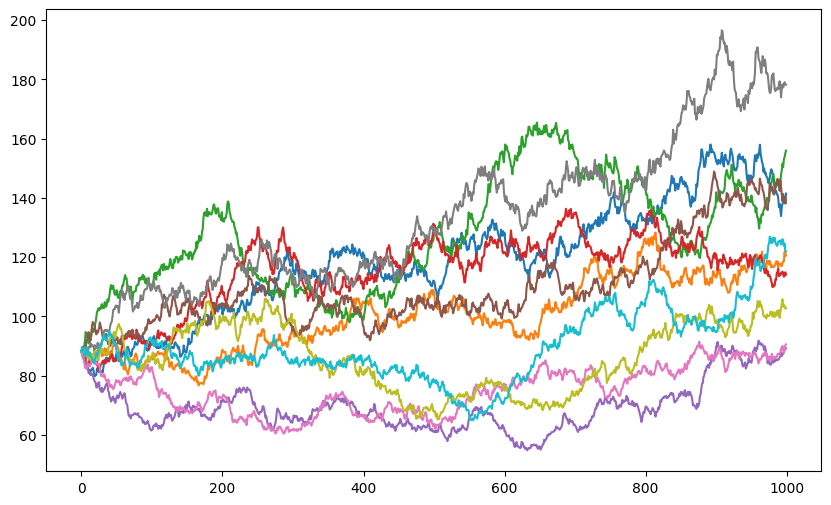

In [34]:
#Plot on graph:
plt.figure(figsize=(10,6))
plt.plot(price_list)

#10 possible iterations

In [ ]:
# Derivatives: Financial Instrument, whose price is derived based on the development of one or more underlying assets
